## TX00DH43exercises2
Marja Satukangas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 1 Forward pass for two-layer ANN with Keras (3p)

Following the example code, implement forward pass for the network described below with Keras. Use weights (1,3,5), (2,4,6) and bias (-1,-2) for the two first layer neurons. For second layer, use weights (-0.1, 0.1) and activation function sigmoid.

In [2]:
model = keras.Sequential()
model.add(layers.Dense(2, input_shape=(3,), use_bias=True))
model.add(layers.Dense(1, use_bias=False, activation='sigmoid'))

W0 = model.layers[0].get_weights()
W1 = model.layers[1].get_weights()

W0[0][0,0] = 1
W0[0][1,0] = 3
W0[0][2,0] = 5

W0[0][0,1] = 2
W0[0][1,1] = 4
W0[0][2,1] = 6

W0[1][0] = -1
W0[1][1] = -2

W1[0][0,0] = -0.1
W1[0][1,0] = 0.1

model.layers[0].set_weights(W0)
model.layers[1].set_weights(W1)

input_sample = np.array(([2,0,1],), dtype=np.float32)

print("Result of forward pass:")
print(model.call(tf.convert_to_tensor(input_sample)))


Result of forward pass:
tf.Tensor([[0.549834]], shape=(1, 1), dtype=float32)


## 2 Forward pass for two-layer ANN with Numpy (2p)

Following the example code, implement forward pass for the exercise 1 case with numpy.

In [3]:
w0 = np.array([[-1,-2], [1,2], [3,4], [5,6]]).T
w1 = np.array([[-0.1], [0.1]]).T

input_sample = np.array(([1,2,0,1],), dtype=np.float32).T

z0 = np.dot(w0, input_sample)
y0 = z0
print(y0)

z1 = np.dot(w1, y0)
print(z1)
y1 = 1/(1 + np.exp(-z1))
print(y1)


[[6.]
 [8.]]
[[0.2]]
[[0.549834]]


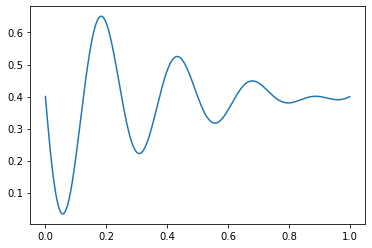

In [4]:
# Create data set

N = 400
x = np.linspace(0,1,N)
y = 0.4 + 0.2 * np.log(x+0.1) * np.sin(8 * 3.14 * x)

plt.plot(x,y)
plt.show()

## 3 Function approximation

Create an ANN model to fit the data. This time there is no need to be concerned about validatition, the result will be plotted against the function to see how the model performs.

Hints:
* you might consider using tanh/sigmoid activation function in hidden layers of the model
* think about the value range of the function - what might be a good activation function in the output layer?
* less that 10 layers should give a complex enough model
* experiment with layer width(s) - way way less that 1000 is enough
* use optimizer='adam' (we'll talk more about optimizers later)
* some tens or even hundreds of epochs might be needed to get a well-performing model

Make a plot of data and model prodictions.

In [5]:
model = keras.models.Sequential()
model.add(layers.Dense(640, input_shape=(1, )))
model.add(layers.Dense(320, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='mse',    
              optimizer='adam')

model.summary()

history = model.fit(x, y, epochs=200, verbose=0)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 640)               1280      
_________________________________________________________________
dense_3 (Dense)              (None, 320)               205120    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               41088     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 257,857
Trainable params: 257,857
Non-trainable params: 0
________________________________________________

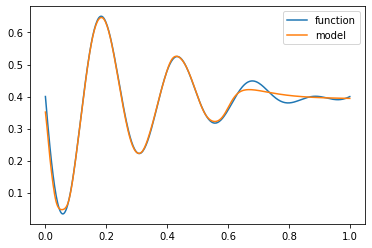

In [6]:
pred = model.predict(x)

plt.plot(x,y, label='function')
plt.plot(x,pred, label='model')
plt.legend()
plt.show()

## 4 Boston housing with deep net

Load and perprocess Boston housing data and create a deep model (< 5 layers) to predict house prices. You should get better predictions than with the single layer model in examples notebook. Plot training and validation accuracies per epoch.

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_ss = scaler.transform(x_train)
x_test_ss = scaler.transform(x_test)

print("Mean x_train values after standardisation with StandardScaler:")
print(np.mean(x_train_ss))
print("Std x_train values after standardisation with StandardScaler:")
print(np.std(x_train_ss))

Mean x_train values after standardisation with StandardScaler:
2.6016254395785847e-15
Std x_train values after standardisation with StandardScaler:
0.9999999999999993


In [8]:
model2 = keras.models.Sequential()

model2.add(layers.Dense(64, input_shape=(13, )))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='relu'))

model2.compile(loss='mse',    
              optimizer='adam')

model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model2.fit(x_train_ss, y_train, epochs=70, validation_data=(x_test_ss, y_test), verbose=0)

In [10]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

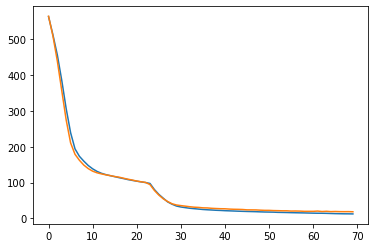

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.show()